In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parámetros de las ondas senoides
amplitud = 1
#frecuencia en Hz
frecuencias = [1, 2, 3]
ciclos = 2

puntos_por_ciclo = 100

#vector de tiempos
# Crear arreglo de tiempo para cada onda
tiempo_por_onda = ciclos / np.array(frecuencias)
tiempo_total = sum(tiempo_por_onda)
num_puntos_total = int(puntos_por_ciclo * sum(tiempo_por_onda))
t = np.linspace(0, tiempo_total, num_puntos_total)
M = len(t)

#Ondas senoides con diferente frecuencia
xt1 = amplitud * np.sin(2 * np.pi * frecuencias[0] * t[:int(puntos_por_ciclo * tiempo_por_onda[0])])
xt2 = amplitud * np.sin(2 * np.pi * frecuencias[1] * (t[int(puntos_por_ciclo * tiempo_por_onda[0]):int(puntos_por_ciclo * (tiempo_por_onda[0] + tiempo_por_onda[1]))] - tiempo_por_onda[0]))
xt3 = amplitud * np.sin(2 * np.pi * frecuencias[2] * (t[int(puntos_por_ciclo * (tiempo_por_onda[0] + tiempo_por_onda[1])):] - sum(tiempo_por_onda[:2])))

# Combinar las ondas
xt = np.concatenate((xt1, xt2, xt3))


In [3]:
tiempo_por_onda

array([2.        , 1.        , 0.66666667])

Text(0.5, 0, 'Tiempo(seg)')

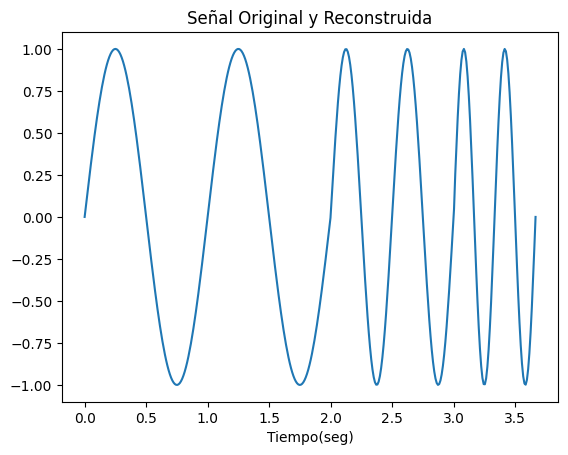

In [4]:
#Grafica de la función x(t)
plt.figure(1)
plt.plot(t,xt)
plt.title('Señal Original y Reconstruida')
plt.xlabel('Tiempo(seg)')

In [7]:
###### SERIES DE FOURIER ##########
#Periodo de la señal
T = 4
T1 = tiempo_por_onda[0]
T2 = tiempo_por_onda[1]
T3 = tiempo_por_onda[2]
#Frecuencia fundamental
fo = 1/T
fo1 = 1/T1
fo2 = 1/T2
fo3 = 1/T3
# espectro ak, espectro bk, espectro ck, espectro phiK
#Coeficiente ao = c0 = x[0] = OFFSET
a0 = 0
#numero de coeficientes (armónicos)
K = 10
#Arreglos para almacenar los coeficientes de la serie de fourier frec 1
ak1 = np.zeros(2*K+1)
bk1 = np.zeros(2*K+1)
ck1 = np.zeros(2*K+1)
pk1 = np.zeros(2*K+1)
fk1 = np.zeros(2*K+1)

#Arreglos para almacenar los coeficientes de la serie de fourier frec 2
ak2 = np.zeros(2*K+1)
bk2 = np.zeros(2*K+1)
ck2 = np.zeros(2*K+1)
pk2 = np.zeros(2*K+1)
fk2 = np.zeros(2*K+1)

#Arreglos para almacenar los coeficientes de la serie de fourier frec 2
ak3 = np.zeros(2*K+1)
bk3 = np.zeros(2*K+1)
ck3 = np.zeros(2*K+1)
pk3 = np.zeros(2*K+1)
fk3 = np.zeros(2*K+1)

#Ciclo para calcular los coeficientes de fourier frec 1
for k in range(-K,K+1):
  #calcular ak y bk
  if k == 0:
    ak1[k+K] = a0
    ck1[k+K] = a0
    bk1[k+K] = 0
  else:
    ak1[k+K] = 0
    bk1[k+K] = (2/np.pi*k)*(np.sin(np.pi*k))
  #Calculo de ck y pk
  ck1[k+K] = np.sqrt(ak1[k+K]**2 + bk1[k+K]**2)
  #primer cuadrante
  if ak1[k+K] >= 0 and bk1[k+K] >= 0:
    pk1[k+K] = np.arctan(bk1[k+K]/ak1[k+K])
  #Segundo cuadrante
  if ak1[k+K] < 0 and bk1[k+K] >= 0:
    pk1[k+K] = np.pi - np.arctan(bk1[k+K]/ak1[k+K])
  #Tercer cuadrante
  if ak1[k+K] < 0 and bk1[k+K] < 0:
    pk1[k+K] = np.pi + np.arctan(bk1[k+K]/ak1[k+K])
  #Cuuarto cuadrante
  if ak1[k+K] >= 0 and bk1[k+K] < 0:
    pk1[k+K] = -np.arctan(bk1[k+K]/ak1[k+K])
  #calcular la frecuencia
  fk1[k+K] = k*fo1

#Ciclo para calcular los coeficientes de fourier frec 2
for k in range(-K,K+1):
  #calcular ak y bk
  if k == 0:
    ak2[k+K] = a0
    ck2[k+K] = a0
    bk2[k+K] = 0
  else:
    ak2[k+K] = 0
    bk2[k+K] = (2/np.pi*k)*(np.sin(np.pi*k))
  #Calculo de ck y pk
  ck2[k+K] = np.sqrt(ak2[k+K]**2 + bk2[k+K]**2)
  #primer cuadrante
  if ak2[k+K] >= 0 and bk2[k+K] >= 0:
    pk2[k+K] = np.arctan(bk2[k+K]/ak2[k+K])
  #Segundo cuadrante
  if ak2[k+K] < 0 and bk2[k+K] >= 0:
    pk2[k+K] = np.pi - np.arctan(bk2[k+K]/ak2[k+K])
  #Tercer cuadrante
  if ak2[k+K] < 0 and bk2[k+K] < 0:
    pk2[k+K] = np.pi + np.arctan(bk2[k+K]/ak2[k+K])
  #Cuuarto cuadrante
  if ak2[k+K] >= 0 and bk2[k+K] < 0:
    pk2[k+K] = -np.arctan(bk2[k+K]/ak2[k+K])
  #calcular la frecuencia
  fk2[k+K] = k*fo2

#Ciclo para calcular los coeficientes de fourier frec 2
for k in range(-K,K+1):
  #calcular ak y bk
  if k == 0:
    ak3[k+K] = a0
    ck3[k+K] = a0
    bk3[k+K] = 0
  else:
    ak3[k+K] = 0
    bk3[k+K] = (2/np.pi*k)*(np.sin(np.pi*k))
  #Calculo de ck y pk
  ck3[k+K] = np.sqrt(ak3[k+K]**2 + bk3[k+K]**2)
  #primer cuadrante
  if ak3[k+K] >= 0 and bk3[k+K] >= 0:
    pk3[k+K] = np.arctan(bk3[k+K]/ak3[k+K])
  #Segundo cuadrante
  if ak3[k+K] < 0 and bk3[k+K] >= 0:
    pk3[k+K] = np.pi - np.arctan(bk3[k+K]/ak3[k+K])
  #Tercer cuadrante
  if ak3[k+K] < 0 and bk3[k+K] < 0:
    pk3[k+K] = np.pi + np.arctan(bk3[k+K]/ak3[k+K])
  #Cuuarto cuadrante
  if ak3[k+K] >= 0 and bk3[k+K] < 0:
    pk3[k+K] = -np.arctan(bk3[k+K]/ak3[k+K])
  #calcular la frecuencia
  fk3[k+K] = k*fo3

<ipython-input-7-8df6349a0b1b>:61: RuntimeWarning: divide by zero encountered in scalar divide
  pk1[k+K] = -np.arctan(bk1[k+K]/ak1[k+K])
<ipython-input-7-8df6349a0b1b>:52: RuntimeWarning: divide by zero encountered in scalar divide
  pk1[k+K] = np.arctan(bk1[k+K]/ak1[k+K])
<ipython-input-7-8df6349a0b1b>:52: RuntimeWarning: invalid value encountered in scalar divide
  pk1[k+K] = np.arctan(bk1[k+K]/ak1[k+K])
<ipython-input-7-8df6349a0b1b>:88: RuntimeWarning: divide by zero encountered in scalar divide
  pk2[k+K] = -np.arctan(bk2[k+K]/ak2[k+K])
<ipython-input-7-8df6349a0b1b>:79: RuntimeWarning: divide by zero encountered in scalar divide
  pk2[k+K] = np.arctan(bk2[k+K]/ak2[k+K])
<ipython-input-7-8df6349a0b1b>:79: RuntimeWarning: invalid value encountered in scalar divide
  pk2[k+K] = np.arctan(bk2[k+K]/ak2[k+K])
<ipython-input-7-8df6349a0b1b>:115: RuntimeWarning: divide by zero encountered in scalar divide
  pk3[k+K] = -np.arctan(bk3[k+K]/ak3[k+K])
<ipython-input-7-8df6349a0b1b>:106: Run

Text(0.5, 0, 'Frecuencia (Hz)')

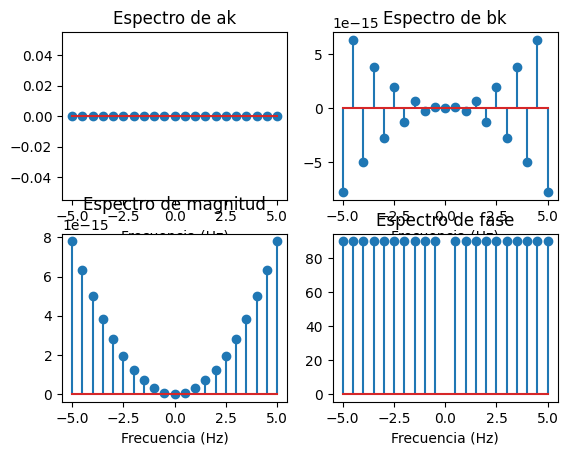

In [8]:
#Grafica de los espectros
plt.figure(2)
plt.subplot(2,2,1)
plt.stem(fk1,ak1)
plt.title('Espectro de ak')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,2)
plt.stem(fk1,bk1)
plt.title('Espectro de bk')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,3)
plt.stem(fk1,ck1)
plt.title('Espectro de magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,4)
plt.stem(fk1,pk1*180/np.pi)
plt.title('Espectro de fase')
plt.xlabel('Frecuencia (Hz)')

Text(0.5, 0, 'Frecuencia (Hz)')

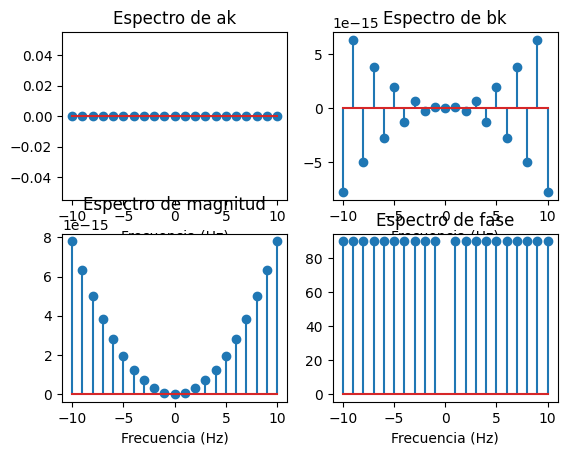

In [9]:
#Grafica de los espectros
plt.figure(2)
plt.subplot(2,2,1)
plt.stem(fk2,ak2)
plt.title('Espectro de ak')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,2)
plt.stem(fk2,bk2)
plt.title('Espectro de bk')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,3)
plt.stem(fk2,ck2)
plt.title('Espectro de magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,4)
plt.stem(fk2,pk2*180/np.pi)
plt.title('Espectro de fase')
plt.xlabel('Frecuencia (Hz)')

Text(0.5, 0, 'Frecuencia (Hz)')

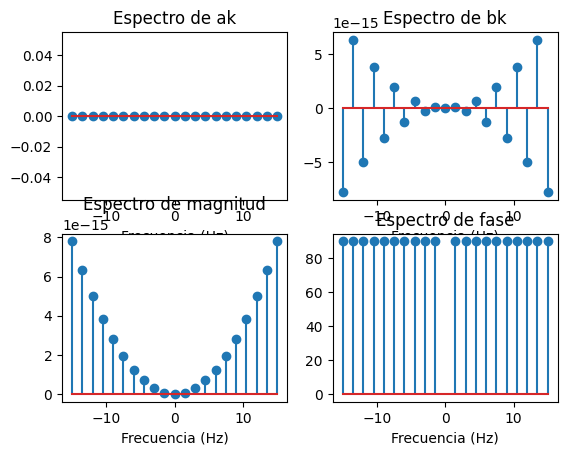

In [10]:
#Grafica de los espectros
plt.figure(2)
plt.subplot(2,2,1)
plt.stem(fk3,ak3)
plt.title('Espectro de ak')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,2)
plt.stem(fk3,bk3)
plt.title('Espectro de bk')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,3)
plt.stem(fk3,ck3)
plt.title('Espectro de magnitud')
plt.xlabel('Frecuencia (Hz)')
plt.subplot(2,2,4)
plt.stem(fk3,pk3*180/np.pi)
plt.title('Espectro de fase')
plt.xlabel('Frecuencia (Hz)')